In [1]:
using LinearAlgebra
using Distributions
using CSV
using DataFrames
using Plots
using Convex, SCS

# 5.3c
ADMM

(5331, 18)(5331, 1)
[1, 1, 5, 6, 2, 1, 1, 1]
[0.42109358030781463, 0.7955690283782707, 0.7920363481611848, 0.3399404453917977, 0.4631295422072942, 0.1485289843585472, 0.7471944563994122, 0.010082916090986873, 0.2856891776685265, 0.717462046212403, 0.9257361198357421, 0.5111626150063923, 0.04073663501901483, 0.09200486888708444, 0.5255255192568256, 0.8293198382092409, 0.6697839927303915, 0.6327007954137103, 0.3607179773444279]
191919
388.81584220690115
49.964938713973154


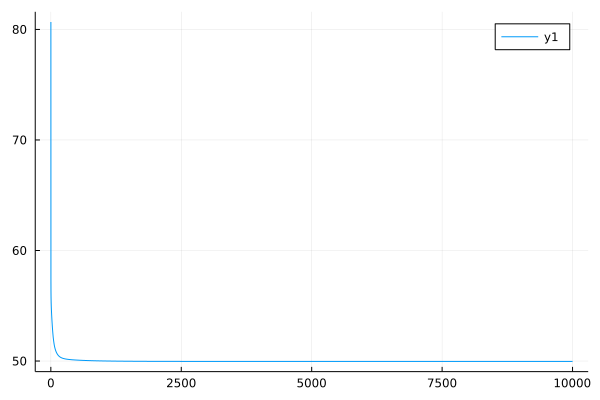

In [49]:
read(path) = Matrix(CSV.read(path, header=false, DataFrame))
X = read("X_train.csv")
y = read("Y_train.csv")
println(size(X), size(y))
n, p = size(X)

num_iters = 10000

β = rand(p+1)
α = rand(p+1)
u = rand(p+1)

X = hcat(ones(n), X)
ρ = 1
λ = 0.02

gs = [1, 2, 3, 8, 14, 16, 17, 18, 19]
J = length(gs)-1
w = [gs[j+1]-gs[j] for j = 1:J]
println(w)
w = sqrt.(w)
# gs[j]+1,gs[j+1]

pj = p÷J
function prox_h(ν, x)
  r = [[x[1]]]  
  for j = 1:J
    start = gs[j]+1
    stop = gs[j+1]
    xj = x[start:stop]
    c = λ*w[j]*ν
    if norm(xj) ≥ c
      push!(r, (1-c/norm(xj)).*xj)
    else
      push!(r, zeros(stop-start+1))
    end
  end
  return vcat(r...)
end
println(prox_h(1, β))
println(length(prox_h(1, β)), length(α), length(β))

fs = []
f(α, β) = 1/(2n)*norm(X*β-y)^2 + λ*sum(norm(α[gs[j]+1:gs[j+1]])*w[j] for j = 1:J)
println(f(α, β))

for i = 1:num_iters
  β = ((1/n)*X'*X + ρ.*I)\(ρ*(α-u) + (1/n)*X'*y)
  α = prox_h(1/ρ, β + u)
  u = u + (β - α)
  push!(fs, f(α, β))
end

admm_fs = fs
println(fs[end])
plot(1:length(fs), fs)

In [50]:
x = Variable(p+1)
cost = 1/(2*n)*sumsquares(X*x-y) + λ*sum(norm(x[2+pj*(j-1):2+pj*j-1])*w[j] for j = 1:J)
problem = minimize(cost)

solve!(problem, SCS.Optimizer; silent_solver = true)
println(problem.status)
println(problem.optval)
println(x.value)
f_star = problem.optval

OPTIMAL
53.787292061582576
[32.37669875215706; 25.622513158354224; -2.0979245473038555; 2.185708626902927; -8.126486579333802; -0.011847289099276972; -0.09818195663046524; -0.011817446441752826; -0.14785486196682737; -0.24593962350209259; -0.10923017862431876; -0.23388752620557218; -0.05737502768832918; -7.484094779462374; -6.234291909320742; -13.469717234766236; 4.012581689266696; -25.696226400550664; 14.733860497573664;;]


53.787292061582576

# 5.3e
Proximal gradient method.

In [53]:
β = rand(p+1)
t = 0.4
∇f(β) = (1/n)*X'*(X*β-y)
f̂(z, β) = f(β,β) + ∇f(β)⋅(z-β) + 1/(2t)*norm(z-β)^2

fs = []
for i = 1:num_iters
  β = prox_h(t, β-t*∇f(β))
  push!(fs, f(β,β))
end
length(fs), fs[end]

(10000, 49.96507071685613)

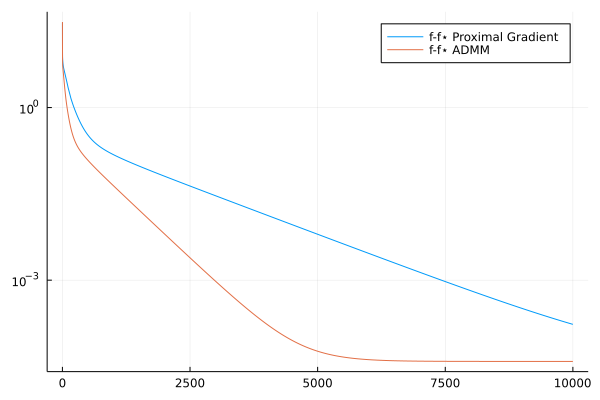

In [58]:
f_star = 49.9649
plot()
plot!(1:num_iters, fs.-f_star, label="f-f⋆ Proximal Gradient", yaxis=:log)
plot!(1:num_iters, admm_fs.-f_star, label="f-f⋆ ADMM", yaxis=:log)

In [57]:
hcat(β,[j∈gs for j∈1:p+1])

19×2 Matrix{Float64}:
  26.6399     1.0
  26.3332     1.0
  -1.85584    1.0
   0.0        0.0
   0.0        0.0
   0.0        0.0
   0.0        0.0
   0.0        1.0
  -0.434655   0.0
  -0.491315   0.0
  -0.549256   0.0
  -0.514776   0.0
   0.0320588  0.0
  -0.549212   1.0
  -5.72373    0.0
  -9.83405    1.0
   3.20701    1.0
 -20.6398     1.0
   9.37295    1.0

All groups except the third one are selected.